In [71]:
from numpy.random import seed
seed(8)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection
%matplotlib inline

### Load and Process the Data

In [49]:
def read_in_and_split_data(iris_data):
    dataset = datasets.load_iris()
    data = dataset['data']
    target = dataset['target']
    train_data, test_data, train_targets, test_targets = model_selection.train_test_split(data, target, test_size=0.1)
    
    return train_data, test_data, train_targets, test_targets

In [50]:
iris_data = datasets.load_iris()
train_data, test_data, train_targets, test_targets = read_in_and_split_data(iris_data)

In [51]:
# convert targets into one-hot encoding

train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))

### Build the Neural Network Model

In [52]:
def get_model(input_shape):
    weight = tf.keras.initializers.HeUniform()
    bias = tf.keras.initializers.Ones()
    
    model = Sequential([
        Dense(64, input_shape=input_shape, kernel_initializer=weight,
              bias_initializer=bias, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
    
    return model
    

In [53]:
model = get_model(train_data[0].shape)

In [54]:
def compile_model(model):    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy']
                        )
    

In [55]:
compile_model(model)

In [56]:
def train_model(model, train_data, train_targets, epochs):
    history = model.fit(train_data, train_targets, batch_size=40, validation_split=0.15, epochs=epochs)
    
    return history

In [57]:
history = train_model(model, train_data, train_targets, epochs=800)

Epoch 1/800
3/3 [==============================] - 1s 87ms/step - loss: 1.1360 - accuracy: 0.3333 - val_loss: 1.0687 - val_accuracy: 0.3810
Epoch 2/800
3/3 [==============================] - 0s 13ms/step - loss: 1.0693 - accuracy: 0.3333 - val_loss: 1.0302 - val_accuracy: 0.3810
Epoch 3/800
3/3 [==============================] - 0s 12ms/step - loss: 1.0280 - accuracy: 0.3333 - val_loss: 1.0150 - val_accuracy: 0.3810
Epoch 4/800
3/3 [==============================] - 0s 12ms/step - loss: 1.0000 - accuracy: 0.3860 - val_loss: 0.9902 - val_accuracy: 0.5714
Epoch 5/800
3/3 [==============================] - 0s 12ms/step - loss: 0.9710 - accuracy: 0.6667 - val_loss: 0.9664 - val_accuracy: 0.5714
Epoch 6/800
3/3 [==============================] - 0s 14ms/step - loss: 0.9443 - accuracy: 0.6842 - val_loss: 0.9447 - val_accuracy: 0.5714
Epoch 7/800
3/3 [==============================] - 0s 14ms/step - loss: 0.9147 - accuracy: 0.6842 - val_loss: 0.9207 - val_accuracy: 0.5714
Epoch 8/800
3/3 [===

### Plot the Learning Curves

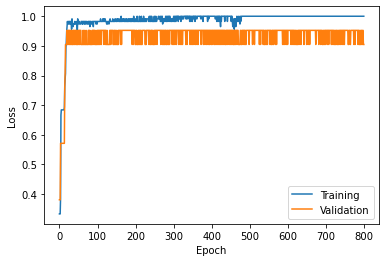

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

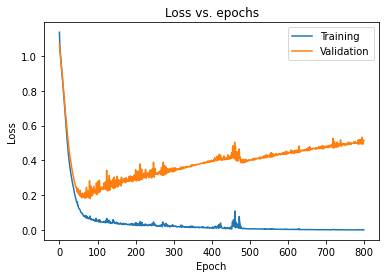

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

### Handle the Overfitting Problem

In [62]:
def get_regularised_model(input_shape, dropout_rate, weight_decay):
    weight = tf.keras.initializers.he_uniform()
    bias = tf.keras.initializers.Ones()
    
    model = Sequential([
        Dense(64, input_shape=input_shape, kernel_initializer=weight, kernel_regularizer = tf.keras.regularizers.l2(weight_decay),
              bias_initializer=bias, activation='relu'),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        tf.keras.layers.Dropout(dropout_rate),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        tf.keras.layers.BatchNormalization(),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        tf.keras.layers.Dropout(dropout_rate),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        Dense(3, activation='softmax')
    ])
    
    return model

In [63]:
reg_model = get_regularised_model(train_data[0].shape, 0.3, 0.001)

In [64]:
compile_model(reg_model)

In [65]:
reg_history = train_model(reg_model, train_data, train_targets, epochs=800)

Epoch 1/800
3/3 [==============================] - 1s 121ms/step - loss: 2.0026 - accuracy: 0.4035 - val_loss: 1.9730 - val_accuracy: 0.3810
Epoch 2/800
3/3 [==============================] - 0s 12ms/step - loss: 1.9798 - accuracy: 0.4386 - val_loss: 1.9577 - val_accuracy: 0.3810
Epoch 3/800
3/3 [==============================] - 0s 15ms/step - loss: 1.9820 - accuracy: 0.3684 - val_loss: 1.9454 - val_accuracy: 0.3810
Epoch 4/800
3/3 [==============================] - 0s 14ms/step - loss: 2.0154 - accuracy: 0.3860 - val_loss: 1.9356 - val_accuracy: 0.3810
Epoch 5/800
3/3 [==============================] - 0s 14ms/step - loss: 1.9592 - accuracy: 0.3947 - val_loss: 1.9258 - val_accuracy: 0.3810
Epoch 6/800
3/3 [==============================] - 0s 13ms/step - loss: 1.9628 - accuracy: 0.3684 - val_loss: 1.9161 - val_accuracy: 0.3810
Epoch 7/800
3/3 [==============================] - 0s 13ms/step - loss: 1.9573 - accuracy: 0.4123 - val_loss: 1.9067 - val_accuracy: 0.1905
Epoch 8/800
3/3 [==

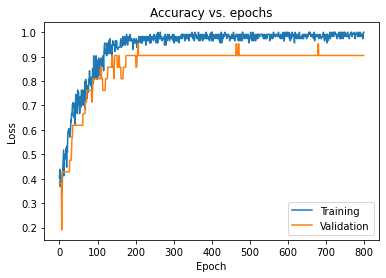

In [66]:
plt.plot(reg_history.history['accuracy'])
plt.plot(reg_history.history['val_accuracy'])

plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

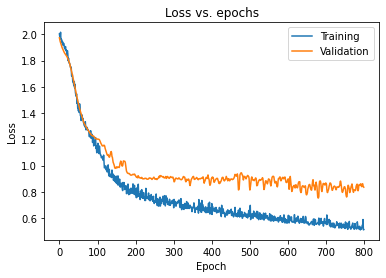

In [67]:
plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [69]:
def get_callbacks():
    early_stopping = EarlyStopping(monitor='val_loss', patience=30, mode='min')
    learning_rate_reduction = ReduceLROnPlateau(factor=0.2, patience=20)
    
    return early_stopping, learning_rate_reduction 

In [72]:
call_model = get_regularised_model(train_data[0].shape, 0.3, 0.0001)
compile_model(call_model)
early_stopping, learning_rate_reduction = get_callbacks()
call_history = call_model.fit(train_data, train_targets, epochs=800, validation_split=0.15,
                         callbacks=[early_stopping, learning_rate_reduction], verbose=0)

In [80]:
early_stopping.patience

30

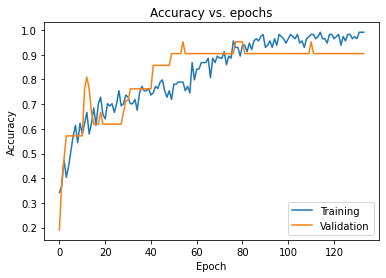

In [75]:
plt.plot(call_history.history['accuracy'])
plt.plot(call_history.history['val_accuracy'])

plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

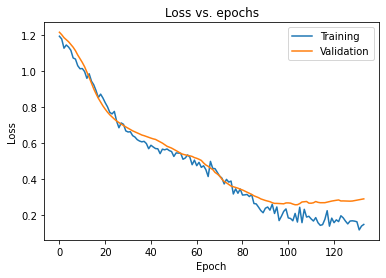

In [76]:
plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [81]:
# Evaluate the model on the test set

test_loss, test_acc = call_model.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))
print(":))")

Test loss: 0.139
Test accuracy: 100.00%
:))
